In [192]:
import tensorflow as tf
from  keras.layers import Dense
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt

In [193]:
X_train = np.array([[1.] ,[2.]])
Y_targets = np.array([[300.],[500.]])
W = np.array([[200] ],dtype=np.float32)
b = np.array([100],dtype=np.float32)
 


In [194]:
layer_1 = Dense( units=1,activation="linear")
layer_1(X_train)  
layer_1.set_weights( [W,b] )
 

In [195]:
a1 = layer_1(X_train[0].reshape(1,1))
print(a1)  
alin = np.dot(W,X_train[0].reshape(1,1)) + b[0]
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [196]:
prediction_tf = layer_1(X_train)
print(W,X_train)
prediction_np = np.dot(X_train,W  ) + b
print(prediction_tf,prediction_np)

[[200.]] [[1.]
 [2.]]
tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32) [[300.]
 [500.]]


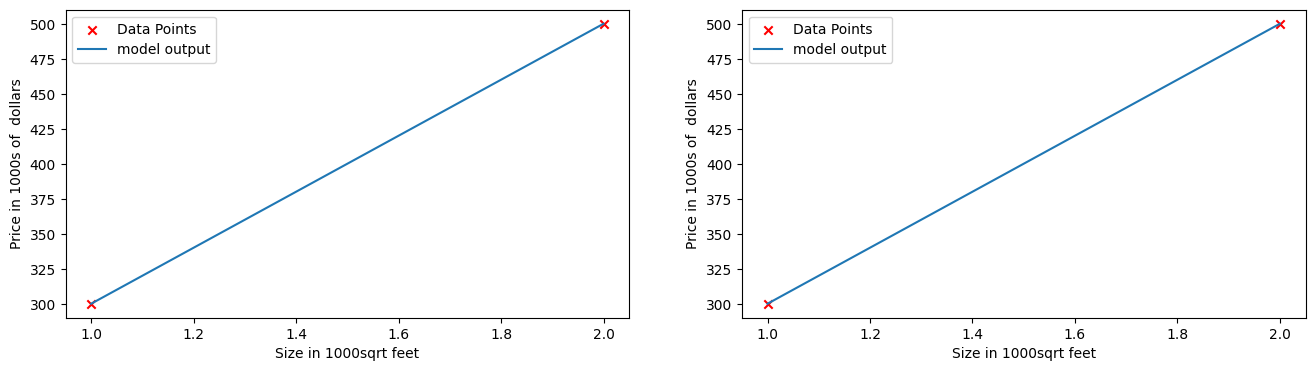

In [197]:
plt.figure(  figsize=(16,4)) 
plt.subplot(1,2,1) 
plt.scatter(X_train ,prediction_tf,c='r',marker="x",label="Data Points") 
plt.plot(X_train ,prediction_tf,label="model output") 
plt.xlabel("Size in 1000sqrt feet")
plt.ylabel("Price in 1000s of  dollars")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_train ,prediction_np,c='r',marker="x",label="Data Points") 
plt.plot(X_train ,prediction_np,label="model output") 
plt.xlabel("Size in 1000sqrt feet")
plt.ylabel("Price in 1000s of  dollars")
plt.legend()
plt.show()

In [198]:
X_train = np.arange(0.,6.).reshape(-1,1)
Y_targets =np.array(np.zeros(3,dtype=np.int32).tolist()+   np.ones(3,dtype=np.int32).tolist()).reshape(-1,1)
print(X_train,Y_targets)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


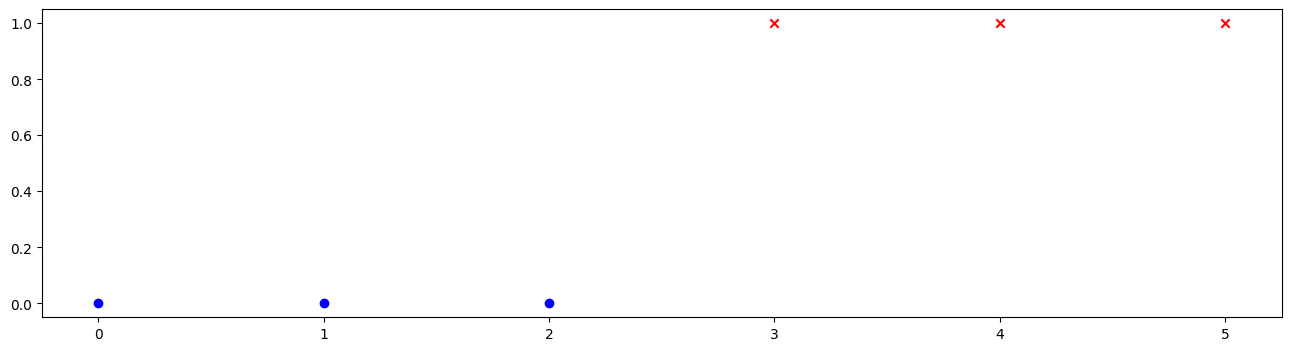

In [199]:
pos = Y_targets==1
neg = Y_targets ==0

plt.figure(figsize=(16,4))
plt.scatter(X_train[pos],Y_targets[pos],label="y=1",marker="x",c="r")
plt.scatter(X_train[neg],Y_targets[neg],label="y=0",marker="o",c="b")
 
plt.show()


In [200]:
model = Sequential([
    Dense(units=1,activation="sigmoid" , input_dim=1, name="L1")
]) 
def sigmoidnp(z):
    
    return 1 / ( 1 + np.exp(-z))

In [201]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [202]:
logistic_layer = model.get_layer("L1") 
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())


[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [203]:
prediction_tf = model.predict(X_train )
z = np.dot(X_train,set_w) + set_b
prediction_np = sigmoidnp(z)
 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


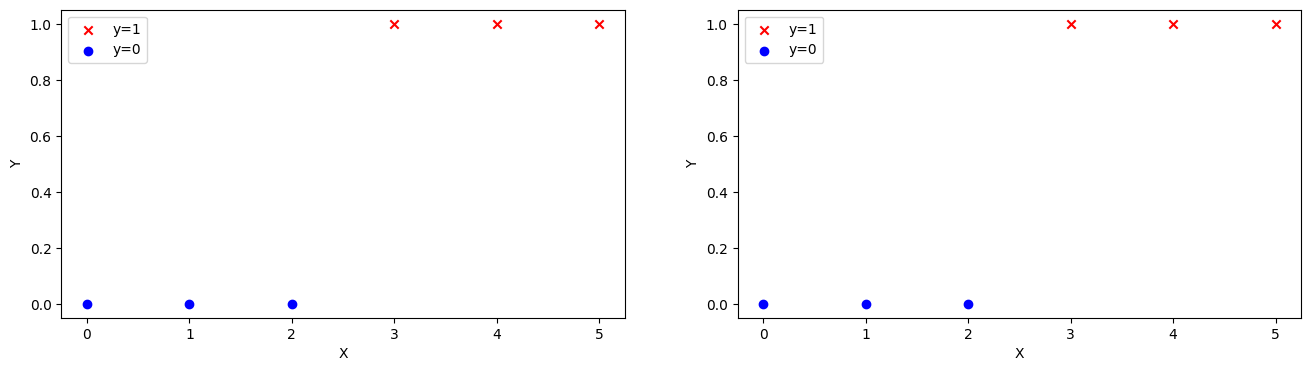

In [204]:
plt.figure(  figsize=(16,4)) 
pos_tf = prediction_tf >=0.5
neg_tf = prediction_tf <0.5
pos_np = prediction_np >=0.5
neg_np = prediction_np <0.5

prediction_tf[pos_tf] = 1 
prediction_tf[neg_tf] =0
prediction_np[pos_np] = 1
prediction_np[neg_np] = 0

plt.subplot(1,2,1) 
plt.scatter(X_train[pos_tf] ,prediction_tf[pos_tf],label="y=1",marker="x",c="r")
plt.scatter(X_train[neg_tf],prediction_tf[neg_tf],label="y=0",marker="o",c="b")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X_train [pos_np] ,prediction_np[pos_np],label="y=1",marker="x",c="r")
plt.scatter(X_train [neg_np],prediction_np[neg_np],label="y=0",marker="o",c="b")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [205]:
prediction_tf

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)